<div style="text-align:center;">
  
  <h1 style="color:darkblue;">Examination of Climate Data, Observation Methods, and Climate Models</h1>
  
  <h3 style="color:darkgreen;">A 5-Day Residential Capacity Building Program for College Teachers</h3>

  <h4 style="color:maroon;">Presented by: Prolay Saha, Ph.D. Scholar</h4>
  
  <h5 style="color:gray;">Department of Physics, Cotton University, India</h5>

</div>

<p style="text-align:left;">
  <span style="color:darkblue;">Venue:</span> <span style="color:black;">Cotton University</span><br>
  <span style="color:darkblue;">Date:</span> <span style="color:black;">20th August, 2024</span>
</p>

<hr style="border:1px solid black; margin-top: 20px; margin-bottom: 20px;">



## <span style="color:teal; font-size: 32px;">Introduction</span>

<p style="font-size: 18px;">
  Welcome to this session on the <span style="color:darkblue; font-size: 20px;">Examination of Climate Data, Observation Methods, and Climate Models</span>.
</p>

<p style="font-size: 18px;">
  In this session, we'll explore how climate data is collected and analyzed, the various methods used to observe climate patterns, and how climate models help predict future climate scenarios. Understanding these aspects is crucial for educators, as it enables them to impart knowledge about climate change effectively to students.
</p>

<p style="font-size: 18px;">
  Let's start by examining a recent projection of global temperature trends, which highlights the critical timeline for reaching 1.5°C above pre-industrial levels:
</p>


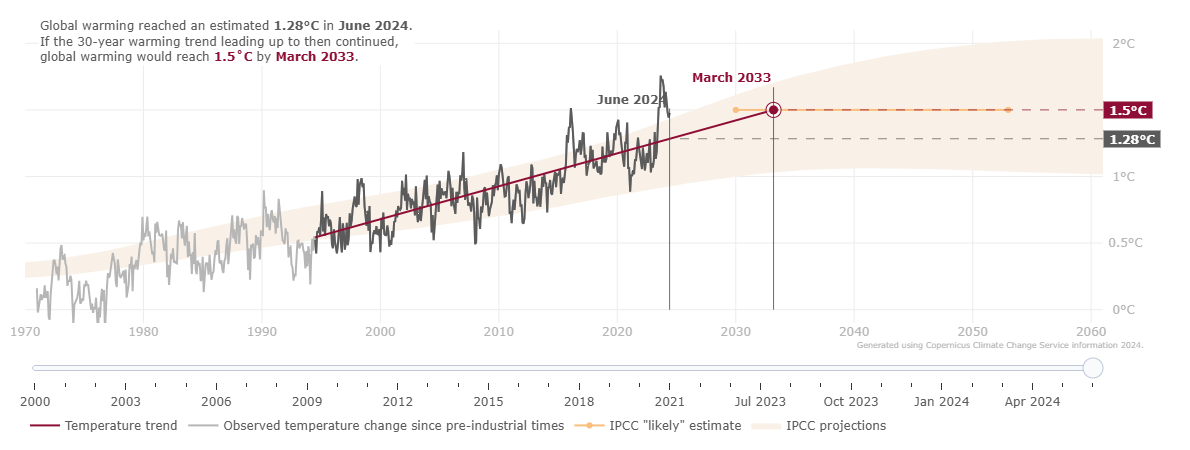

In [35]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = "D:/teachers_training_program/figures/fig1.png"
display(Image(filename=image_path))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


### <span style="color:red; font-size: 25px;">1. What is Climate Data?</span>

<p style="color:blue; font-size: 18px;">
Climate data includes long-term records of <span style="color:orange; font-weight:bold;">temperature</span>, 
<span style="color:green; font-weight:bold;">rainfall</span>, and other atmospheric variables. 
For instance, the dataset above shows <span style="color:orange; font-weight:bold;">temperature</span> records over time, while the example below illustrates how <span style="color:green; font-weight:bold;">rainfall</span> patterns have changed. Understanding such data helps identify trends and patterns in climate change.
</p>

### <span style="color:red; font-size: 25px;">Let's look at an example: How has <span style="color:green;">rainfall</span> changed over time?</span>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from pandas import DataFrame as DF
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter, PercentFormatter)
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import xarray as xr
import pandas as pd
from matplotlib.patches import Rectangle
from datetime import datetime, timedelta, date, time
import os.path
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from datetime import datetime
from datetime import timedelta
import scipy.io
import colormaps as cmaps 
from scipy.stats import norm
from scipy.stats import gaussian_kde

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=xr.coding.times.SerializationWarning)  # Corrected this line


In [3]:


dataset= xr.open_dataset(r"D:\teachers_training_program\NEI24.nc")



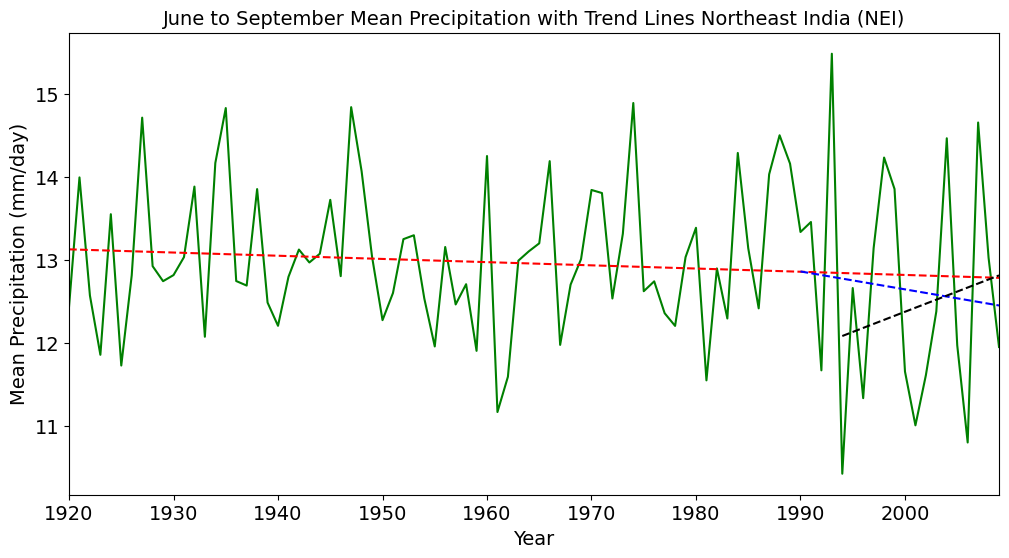

In [4]:
june_sep_precip = dataset.sel(time=dataset['time'].dt.month.isin([6, 7, 8, 9]))

# Grouping by year and calculating the mean precipitation for June to September
annual_precip = june_sep_precip['precipitation'].groupby('time.year').mean(dim='time')

# Extracting years and precipitation values for linear regression
years = annual_precip['year'].values
precip_values = annual_precip.values

# Define the font size for ticks
fnt = 14

# Perform linear regression for the period 1920-2009
start_year_1920 = 1920
filtered_years_1920 = years[years >= start_year_1920]
filtered_precip_values_1920 = precip_values[years >= start_year_1920]
slope_1920_2009, intercept_1920_2009 = np.polyfit(filtered_years_1920, filtered_precip_values_1920, 1)
slope_1920_2009_per_decade = slope_1920_2009 * 10  # Convert slope to per decade
trend_line_1920_2009 = slope_1920_2009 * filtered_years_1920 + intercept_1920_2009

# Perform linear regression for the period 2000-2009
start_year_2000 = 1990
filtered_years_2000 = years[years >= start_year_2000]
filtered_precip_values_2000 = precip_values[years >= start_year_2000]
slope_2000_2009, intercept_2000_2009 = np.polyfit(filtered_years_2000, filtered_precip_values_2000, 1)
slope_2000_2009_per_decade = slope_2000_2009 * 10  # Convert slope to per decade
trend_line_2000_2009 = slope_2000_2009 * filtered_years_2000 + intercept_2000_2009

# Plotting the time series with the two linear trend lines
plt.figure(figsize=(12, 6))
plt.plot(years, precip_values, color='green', label='Mean Precipitation (June-Sep)')
plt.plot(filtered_years_1920, trend_line_1920_2009, color='red', linestyle='--', label=f'Trend Line (1920-2009, slope = {slope_1920_2009_per_decade:.4f} mm/day/decade)')
plt.plot(filtered_years_2000, trend_line_2000_2009, color='blue', linestyle='--', label=f'Trend Line (2000-2009, slope = {slope_2000_2009_per_decade:.4f} mm/day/decade)')

# Perform linear regression for the period 2000-2009
start_year_2000 = 1994
filtered_years_2000 = years[years >= start_year_2000]
filtered_precip_values_2000 = precip_values[years >= start_year_2000]
slope_2000_2009, intercept_2000_2009 = np.polyfit(filtered_years_2000, filtered_precip_values_2000, 1)
slope_2000_2009_per_decade = slope_2000_2009 * 10  # Convert slope to per decade
trend_line_2000_2009 = slope_2000_2009 * filtered_years_2000 + intercept_2000_2009
plt.plot(filtered_years_2000, trend_line_2000_2009, color='k', linestyle='--', label=f'Trend Line (2000-2009, slope = {slope_2000_2009_per_decade:.4f} mm/day/decade)')


plt.title('June to September Mean Precipitation with Trend Lines Northeast India (NEI)',fontsize=fnt)
plt.xlabel('Year', fontsize=fnt)
plt.ylabel('Mean Precipitation (mm/day)', fontsize=fnt)
plt.xticks(fontsize=fnt)  # Set x-tick font size
plt.yticks(fontsize=fnt)  # Set y-tick font size
plt.xlim(1920, 2009)
plt.grid(False)
plt.show()


# odir = r"D:\teachers_training_program\figures\\"
# plt.savefig(odir + 'fig2.png', dpi=300, facecolor='w', edgecolor='w', transparent=False)




### Key Variables in Climate Data Analysis

<p style="font-size: 18px;">
In climate data analysis, several key variables are crucial for understanding and predicting climate changes. These variables include:
</p>

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #ccc; font-size: 18px;">
    <ol style="margin-left: 20px; line-height: 1.8;">
        <li><span style="color:orange; font-weight:bold;">Temperature:</span> Monitoring changes in average temperatures over time provides insights into <a href="https://climate.nasa.gov/vital-signs/global-temperature/" target="_blank" style="color:orange;">global and regional warming trends</a>.</li>
        <li><span style="color:green; font-weight:bold;">Precipitation:</span> Examining patterns of rainfall and snowfall helps understand changes in precipitation regimes and identify <a href="https://www.worldbank.org/en/topic/climatechange/brief/floods-and-droughts" target="_blank" style="color:green;">drought or flood-prone areas</a>.</li>
        <li><span style="color:blue; font-weight:bold;">Atmospheric Composition:</span> Tracking greenhouse gas concentrations, such as carbon dioxide and methane, helps assess the role of <a href="https://www.epa.gov/ghgemissions/overview-greenhouse-gases" target="_blank" style="color:blue;">human activities in climate change</a>.</li>
        <li><span style="color:purple; font-weight:bold;">Sea Level:</span> Measuring changes in sea level provides information about the thermal expansion of seawater and the melting of glaciers and ice caps. <a href="https://oceanservice.noaa.gov/facts/sealevel.html" target="_blank" style="color:purple;">Learn more</a>.</li>
        <li><span style="color:teal; font-weight:bold;">Ocean Currents and Temperatures:</span> Understanding variations in ocean currents and temperatures is crucial for predicting climate phenomena like <a href="https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/enso_advisory/" target="_blank" style="color:teal;">El Niño and La Niña</a>. You can monitor real-time ENSO conditions through <a href="http://www.bom.gov.au/climate/enso/" target="_blank" style="color:teal;">Australian Bureau of Meteorology</a>, <a href="https://climate.nasa.gov/vital-signs/enso/" target="_blank" style="color:teal;">NASA</a>, or <a href="https://www.pmel.noaa.gov/elnino/" target="_blank" style="color:teal;">NOAA PMEL</a>.</li>
        <li><span style="color:brown; font-weight:bold;">Ice Cover:</span> Monitoring changes in ice cover, such as Arctic sea ice extent and glacier mass balance, helps assess the impact of climate change on polar regions. <a href="https://climate.nasa.gov/vital-signs/arctic-sea-ice/" target="_blank" style="color:brown;">Explore Arctic Sea Ice Data</a>.</li>



### <span style="color:#dc3545;font-size: 25px">2. What Are the Different Observation Methods Used in Climate Science?</span>

<p style="font-size: 18px;">
Observation methods in climate science encompass a variety of techniques, each providing unique insights into different aspects of the Earth's climate system. Below, we explore key observation methods: ground-based measurements, satellite data, ocean buoys, reanalysis data, and climate model intercomparison projects. Each of these methods plays a critical role in our understanding of climate patterns, changes, and trends.
</p>

#### I. Ground-Based Measurements

<div style="background-color:#eef; padding: 15px; border-left: 5px solid #007bff; margin-bottom: 20px;">
    <ul style="margin-left: 20px; line-height: 1.8;">
        <li><strong>Weather Stations:</strong> Strategically located weather stations around the globe measure atmospheric parameters such as temperature, humidity, wind speed, direction, and pressure. These stations provide high-quality, continuous data over long periods, forming the backbone of climate monitoring networks.</li>
        <li><strong>Radiosondes:</strong> Balloons equipped with instruments (radiosondes) ascend through the atmosphere, recording temperature, humidity, and pressure at different altitudes. This data helps create vertical profiles of the atmosphere and aids in understanding atmospheric dynamics and stability. You can explore radiosonde data from <a href="http://weather.uwyo.edu/upperair/sounding.html" target="_blank" style="color:#007bff;">University of Wyoming</a>.</li>
    </ul>
</div>

#### II. Satellite Data

<div style="background-color:#f8f9fa; padding: 15px; border-left: 5px solid #28a745; margin-bottom: 20px;">
    <ul style="margin-left: 20px; line-height: 1.8;">
        <li><strong>Remote Sensing:</strong> Satellites equipped with sensors observe the Earth's surface, atmosphere, and oceans from space. These sensors measure a wide range of parameters, including sea surface temperature, cloud cover, atmospheric composition, and vegetation health. Remote sensing provides a global perspective, enabling the monitoring of large-scale climate patterns and changes.</li>
        <li><strong>TRMM:</strong> The Tropical Rainfall Measuring Mission (TRMM) was a joint mission between NASA and JAXA that provided valuable data on tropical and subtropical rainfall. You can access TRMM data <a href="https://giovanni.gsfc.nasa.gov/giovanni/" target="_blank" style="color:#28a745;">here</a>.</li>
        <li><strong>GPM/IMERG:</strong> The Global Precipitation Measurement (GPM) mission, which succeeded TRMM, continues to provide important precipitation data globally. Access GPM/IMERG data <a href="https://gpm.nasa.gov/data" target="_blank" style="color:#28a745;">here</a>.</li>
        <li><strong>GSMaP:</strong> The Global Satellite Mapping of Precipitation (GSMaP) provides near-real-time global precipitation data, which can be accessed <a href="https://sharaku.eorc.jaxa.jp/GSMaP/" target="_blank" style="color:#28a745;">here</a>.</li>
    </ul>
</div>



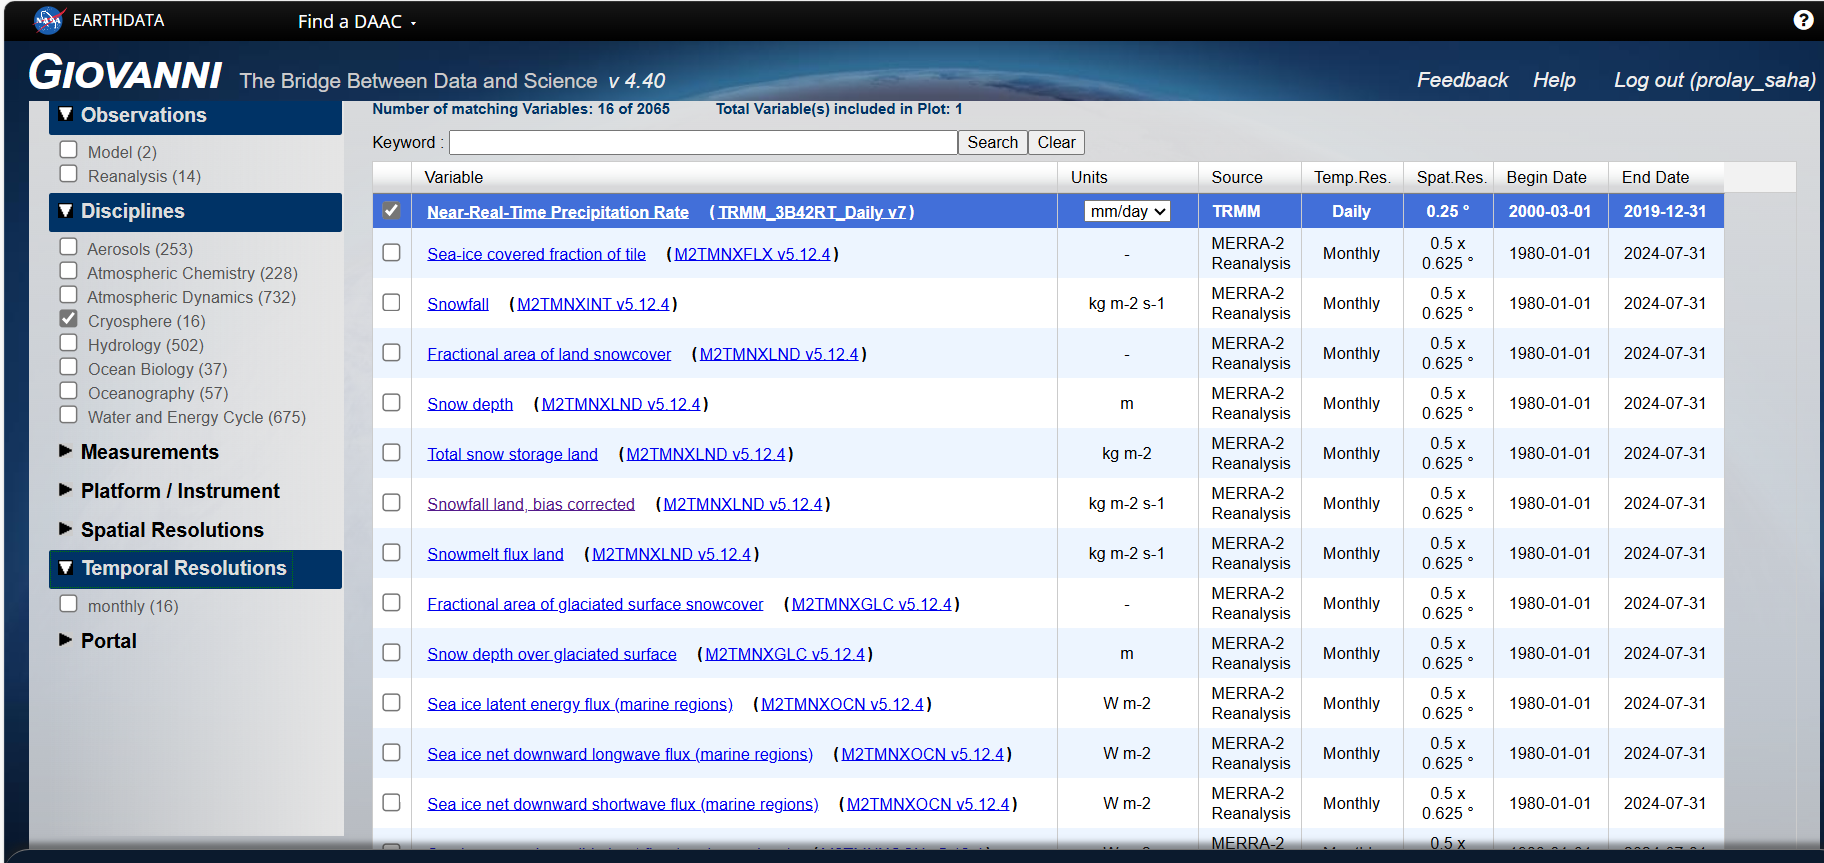

In [49]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\Screenshot 2024-08-20 093254.png"
display(Image(filename=image_path, width=800, height=300))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


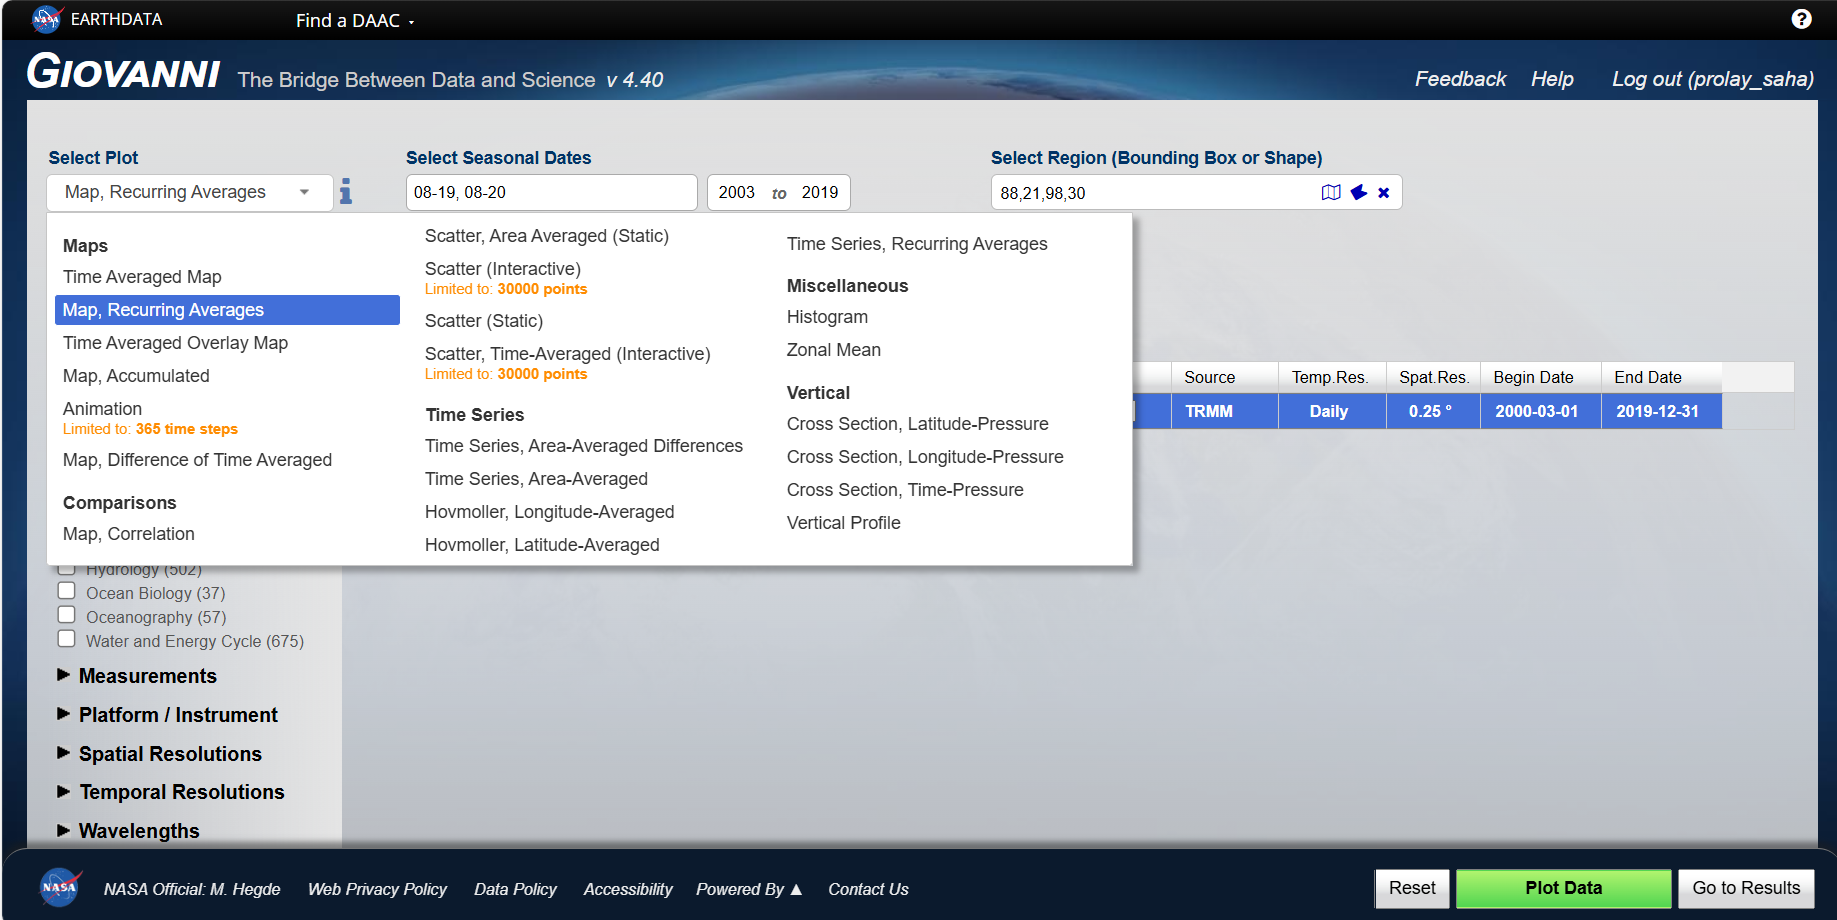

In [50]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\Screenshot 2024-08-20 093057.png"
display(Image(filename=image_path, width=800, height=300))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


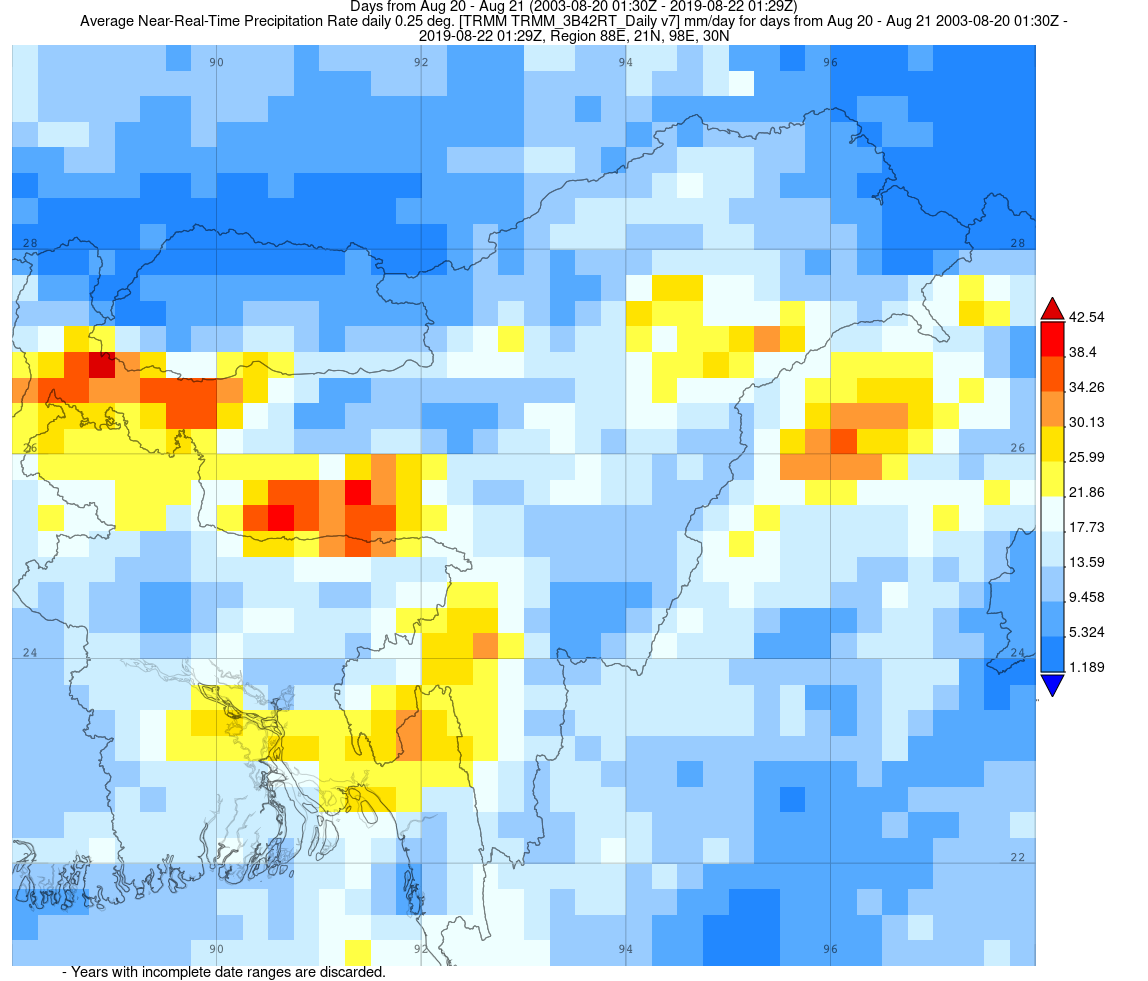

In [43]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\GIOVANNI-outputip1hABKd.png"
display(Image(filename=image_path, width=800, height=300))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


<div style="background-color:#f8f9fa; padding: 20px; border-radius: 10px; text-align:center; font-family: Arial, sans-serif;">

## <span style="color:#007bff; font-size: 26px;">Time Series of Area-Averaged Precipitation Rate over NE</span>

<p style="font-size: 18px; color:#343a40;">
This figure shows the area-averaged precipitation rate (in mm/day) from the TRMM 3B42 dataset, daily averaged at a 0.25° resolution, over the region bounded by 89°E to 98°E longitude and 22°N to 30°N latitude. The data spans from January 1, 1998, to December 31, 2019. The plot highlights the seasonal and interannual variability in precipitation over this region.
</p>

</div>


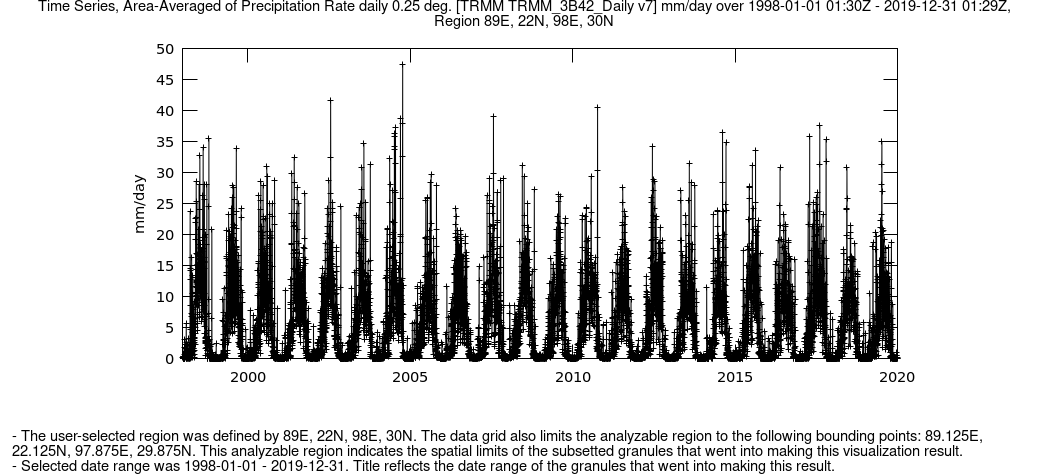

In [44]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\GIOVANNI-outputOlWBluLH.png"
display(Image(filename=image_path, width=800, height=300))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


<div style="background-color:#f8f9fa; padding: 20px; border-radius: 10px; text-align:center; font-family: Arial, sans-serif;">

## <span style="color:#007bff; font-size: 26px;">Figure: JAXA RIKEN Nowcast Precipitation Forecast</span>

<p style="font-size: 18px; color:#343a40;">
This figure displays the precipitation forecast from the JAXA RIKEN Nowcast (GSMaP RNC) for August 20, 2024, at 03:00 UTC. The map shows the predicted precipitation intensity across parts of India, Nepal, Bhutan, and Bangladesh, with high-resolution data highlighting potential rainfall regions. This visualization is crucial for monitoring and forecasting precipitation patterns in the region.
</p>

<p style="font-size: 18px; color:#343a40;">
The data was generated based on an initial forecast time of 21:00 UTC on August 19, 2024. The information provided here can be used for short-term weather forecasting, aiding in disaster preparedness and resource management in affected regions.
</p>

<p style="font-size: 18px; color:#343a40;">
For more details, visit the official GSMaP RNC page: 
<a href="https://sharaku.eorc.jaxa.jp/GSMaP_RNC/index.htm" target="_blank" style="color:#007bff;">GSMaP RNC</a>.
</p>

</div>


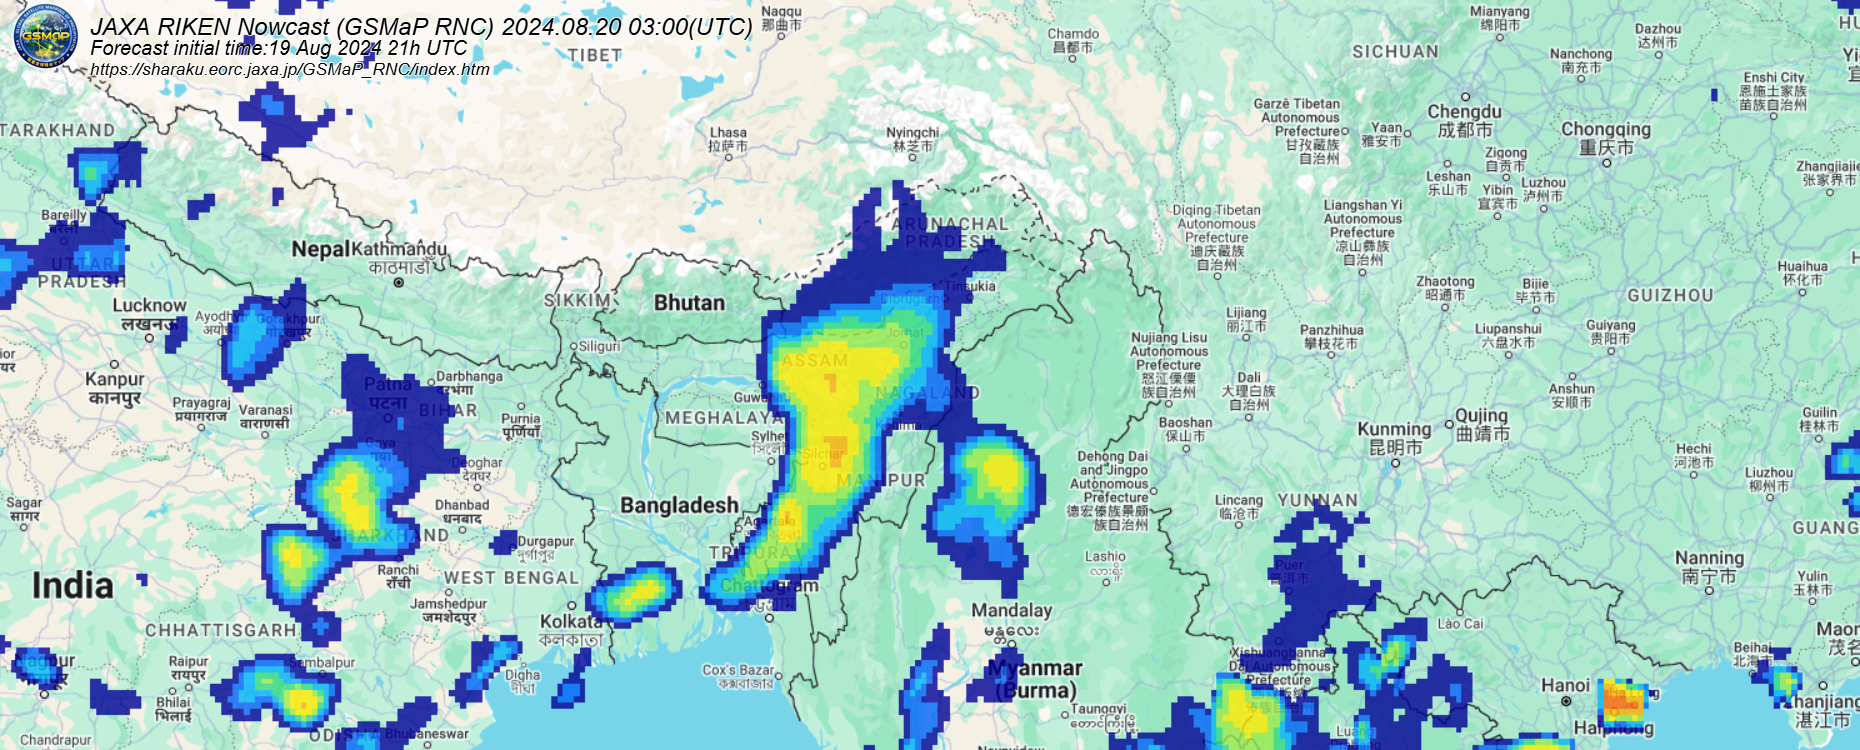

In [78]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\gsmap_rnc_initial202408192100_202408200300.png"
display(Image(filename=image_path, width=750, height=400))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


#### III. Ocean Buoys

<div style="background-color:#e9ecef; padding: 15px; border-left: 5px solid #6c757d; margin-bottom: 20px;">
    <ul style="margin-left: 20px; line-height: 1.8;">
        <li><strong>Floating Platforms:</strong> Ocean buoys are floating platforms equipped with sensors that measure sea surface temperature, salinity, and other oceanographic parameters. These buoys provide real-time data from remote areas of the ocean, contributing to the understanding of ocean circulation patterns and heat distribution. Access ocean buoy data from the <a href="https://www.ndbc.noaa.gov/" target="_blank" style="color:#6c757d;">NOAA National Data Buoy Center</a>.</li>
        <li><strong>Argo Floats:</strong> Argo floats are autonomous profiling floats that drift with ocean currents and periodically dive to depths, collecting temperature and salinity data. Argo floats form a global network, allowing continuous monitoring of the upper ocean layer and providing insights into ocean heat content and circulation. Access Argo data <a href="https://argo.ucsd.edu/" target="_blank" style="color:#6c757d;">here</a>.</li>
    </ul>
</div>

#### IV. Reanalysis Data

<div style="background-color:#fff3cd; padding: 15px; border-left: 5px solid #ffc107; margin-bottom: 20px;">
    <ul style="margin-left: 20px; line-height: 1.8;">
        <li><strong>NCEP Reanalysis:</strong> The National Centers for Environmental Prediction (NCEP) provides reanalysis datasets that integrate data from multiple sources to produce a comprehensive, long-term record of atmospheric conditions. Access NCEP Reanalysis data <a href="https://psl.noaa.gov/data/reanalysis/reanalysis.shtml" target="_blank" style="color:#ffc107;">here</a>.</li>
        <li><strong>ERA5:</strong> ERA5 is the latest climate reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF), providing detailed global climate data from 1950 onwards. Access ERA5 data <a href="https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset" target="_blank" style="color:#ffc107;">here</a>.</li>
    </ul>
</div>

#### V. Climate Model Intercomparison Projects (CMIPs)

<div style="background-color:#e2e3e5; padding: 15px; border-left: 5px solid #343a40; margin-bottom: 20px;">
    <ul style="margin-left: 20px; line-height: 1.8;">
        <li><strong>CMIP5:</strong> The Coupled Model Intercomparison Project Phase 5 (CMIP5) provided climate model simulations that informed the IPCC's Fifth Assessment Report. Access CMIP5 data <a href="https://esgf-node.llnl.gov/projects/cmip5/" target="_blank" style="color:#343a40;">here</a>.</li>
        <li><strong>CMIP6:</strong> CMIP6 is the latest phase, contributing to the IPCC's Sixth Assessment Report, with an updated set of models and experiments. Access CMIP6 data <a href="https://esgf-node.ipsl.upmc.fr/search/cmip6-ipsl/" target="_blank" style="color:#343a40;">here</a>.</li>
    </ul>
</div>

### Next Question

<p style="font-size: 18px;">
Now that we have explored various observation methods used in climate science, let's consider the next key question:
</p>



### <span style="color:#dc3545;">3. What Role Do Climate Models Play in Predicting Future Climate Scenarios?</span>

<p style="font-size: 18px;">
<span style="color:#007bff; font-weight:bold;">Climate models</span> are essential tools in climate science, providing critical insights into how the Earth's climate system may change in the future. These models use mathematical equations to simulate the interactions between the atmosphere, oceans, land surface, and ice. By understanding and predicting these interactions, <span style="color:#007bff; font-weight:bold;">climate models</span> help scientists and policymakers prepare for future climate <span style="color:#28a745; font-weight:bold;">scenarios</span>.
</p>

<p style="font-size: 18px;">
Climate models are essential tools in climate science, providing critical insights into how the Earth's climate system may change in the future. These models use mathematical equations to simulate the interactions between the atmosphere, oceans, land surface, and ice. By understanding and predicting these interactions, climate models help scientists and policymakers prepare for future climate conditions.
</p>


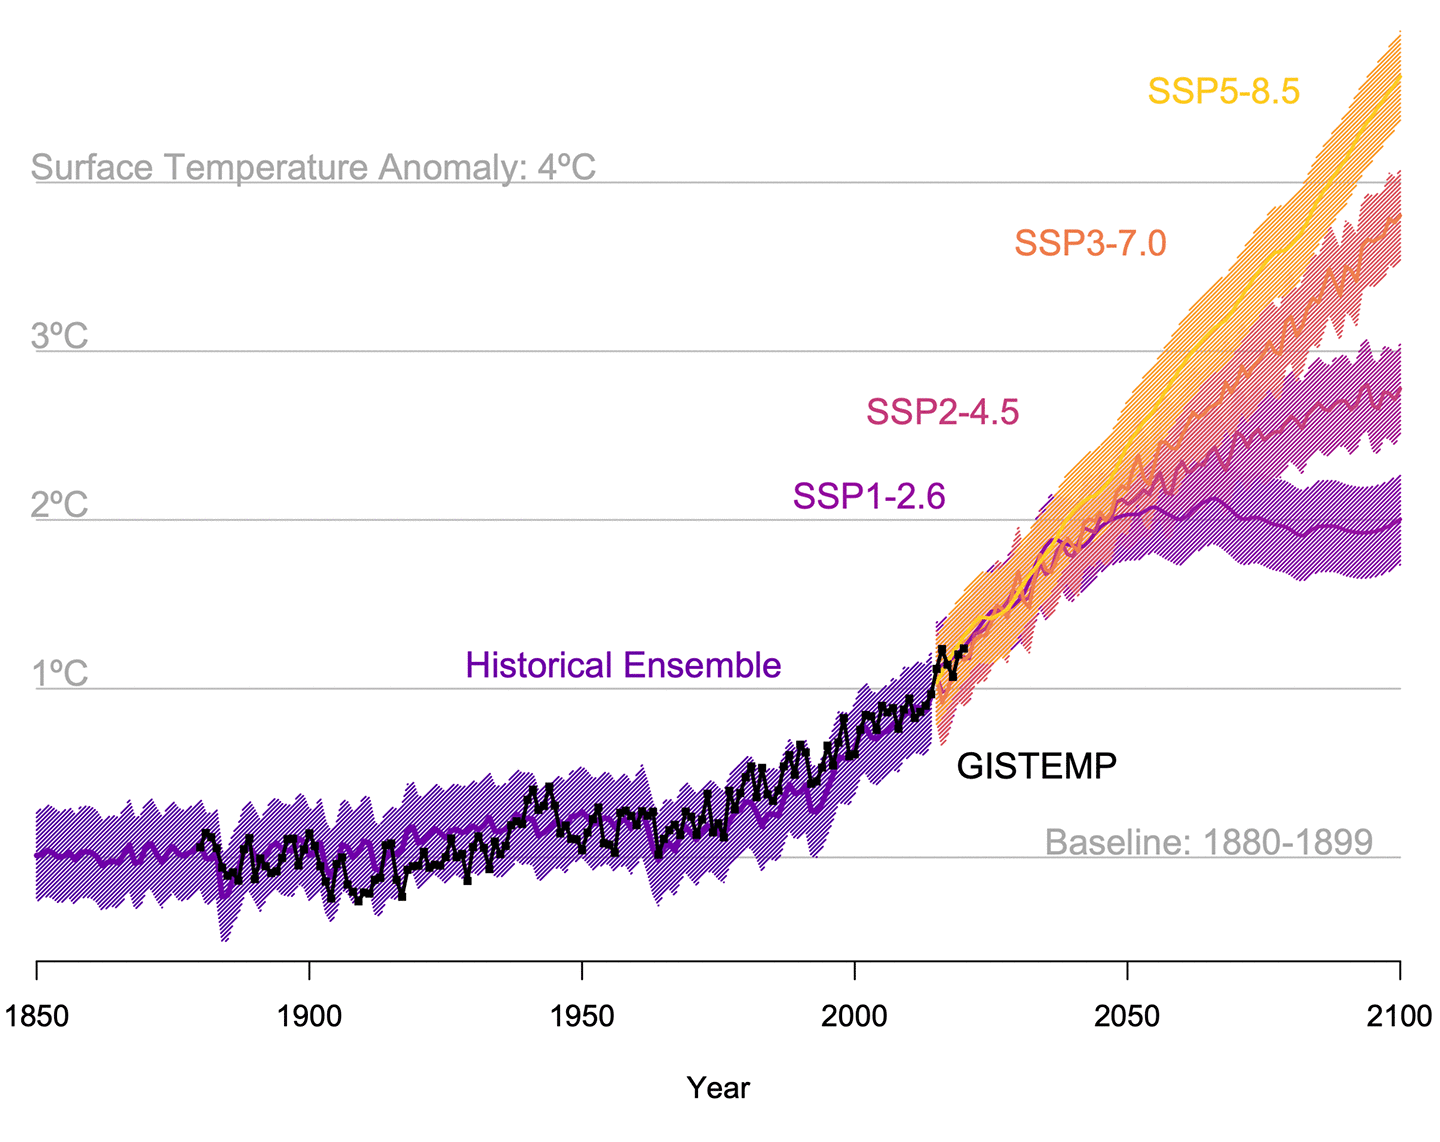

In [55]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\fig3.png"

# Display the image with a standard size
display(Image(filename=image_path, width=900, height=200))  # Adjust width and height as needed

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 10px; text-align:center; font-family: Arial, sans-serif;">

## <span style="color:#007bff; font-size: 28px;">Understanding and Computing the Climate Change Signal</span>

<p style="font-size: 18px; color:#343a40;">
Climate change signals can be quantified by analyzing shifts in temperature distributions over time. By comparing temperature anomalies from different periods, we can assess the extent of warming and its impact on the frequency and intensity of extreme weather events.
</p>

---



---

### <span style="color:#dc3545; font-size: 24px;">Identifying the Climate Change Signal</span>

<p style="font-size: 18px; color:#343a40;">
The next figure illustrates the impact of climate change by showing how a shift in the average temperature affects the distribution of temperature extremes. The red-shaded area represents an increase in the frequency of extremely hot weather, while the blue-shaded area shows a decrease in the frequency of extremely cold weather.
</p>

<p style="font-size: 18px; color:#343a40;">
This shift in the distribution is what we refer to as the "climate change signal." It quantifies the impact of global warming on temperature extremes, which are crucial for understanding future climate risks.
</p>




---

### <span style="color:#ffc107; font-size: 24px;">Computing the Signal</span>

<p style="font-size: 18px; color:#343a40;">
To compute the climate change signal, follow these steps:
</p>

<ul style="font-size: 18px; color:#343a40; text-align: left; display: inline-block;">
    <li>Collect temperature data for different time periods (e.g., 1940-1949 vs. 2010-2019).</li>
    <li>Normalize the temperature data to remove biases and focus on anomalies.</li>
    <li>Calculate the probability distribution for each period using techniques like KDE.</li>
    <li>Identify the shift in the distribution towards warmer temperatures.</li>
    <li>Quantify the change in the frequency and intensity of extreme temperatures.</li>
</ul>

<p style="font-size: 18px; color:#343a40;">
The greater the shift in the distribution towards higher temperatures, the stronger the climate change signal. This approach helps in assessing the potential impacts of climate change on future weather patterns and preparing for the associated risks.
</p>

</div>


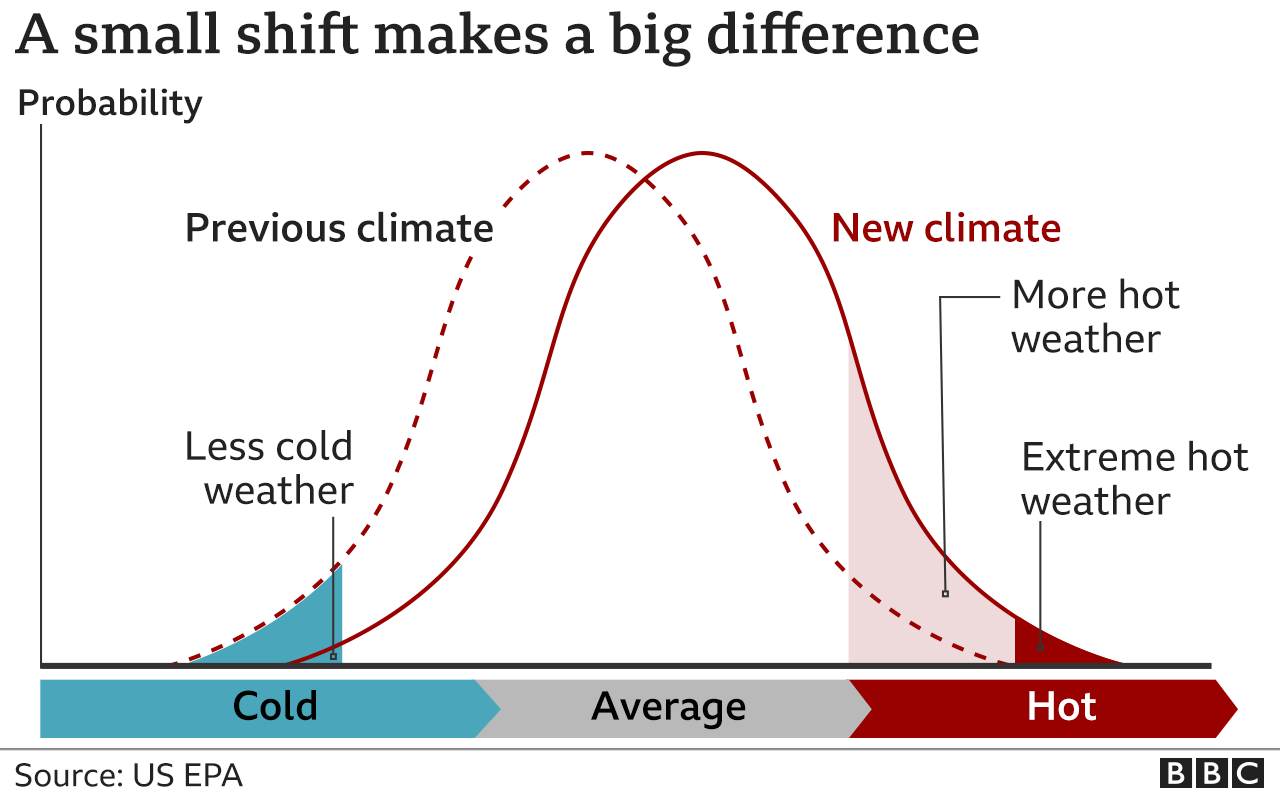

In [72]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\tpdf.png"

# Display the image with a standard size
display(Image(filename=image_path, width=500, height=200))  # Adjust width and height as needed

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')



### <span style="color:#28a745; font-size: 24px;">Temperature Distribution Over NE</span>

<p style="font-size: 18px; color:#343a40;">
One of the key methods to understand the climate change signal is to compare the probability distributions of temperature anomalies across different time periods. The figure below shows kernel density estimates (KDE) of normalized 2m temperature anomalies over Northeast India for two periods: 1940-1949 and 2010-2019.
</p>

<p style="font-size: 18px; color:#343a40;">
The shift in the distribution towards higher temperatures in recent years indicates an increase in average temperatures, a hallmark of climate change. The percentages show the probability of occurrence within specific temperature ranges.
</p>


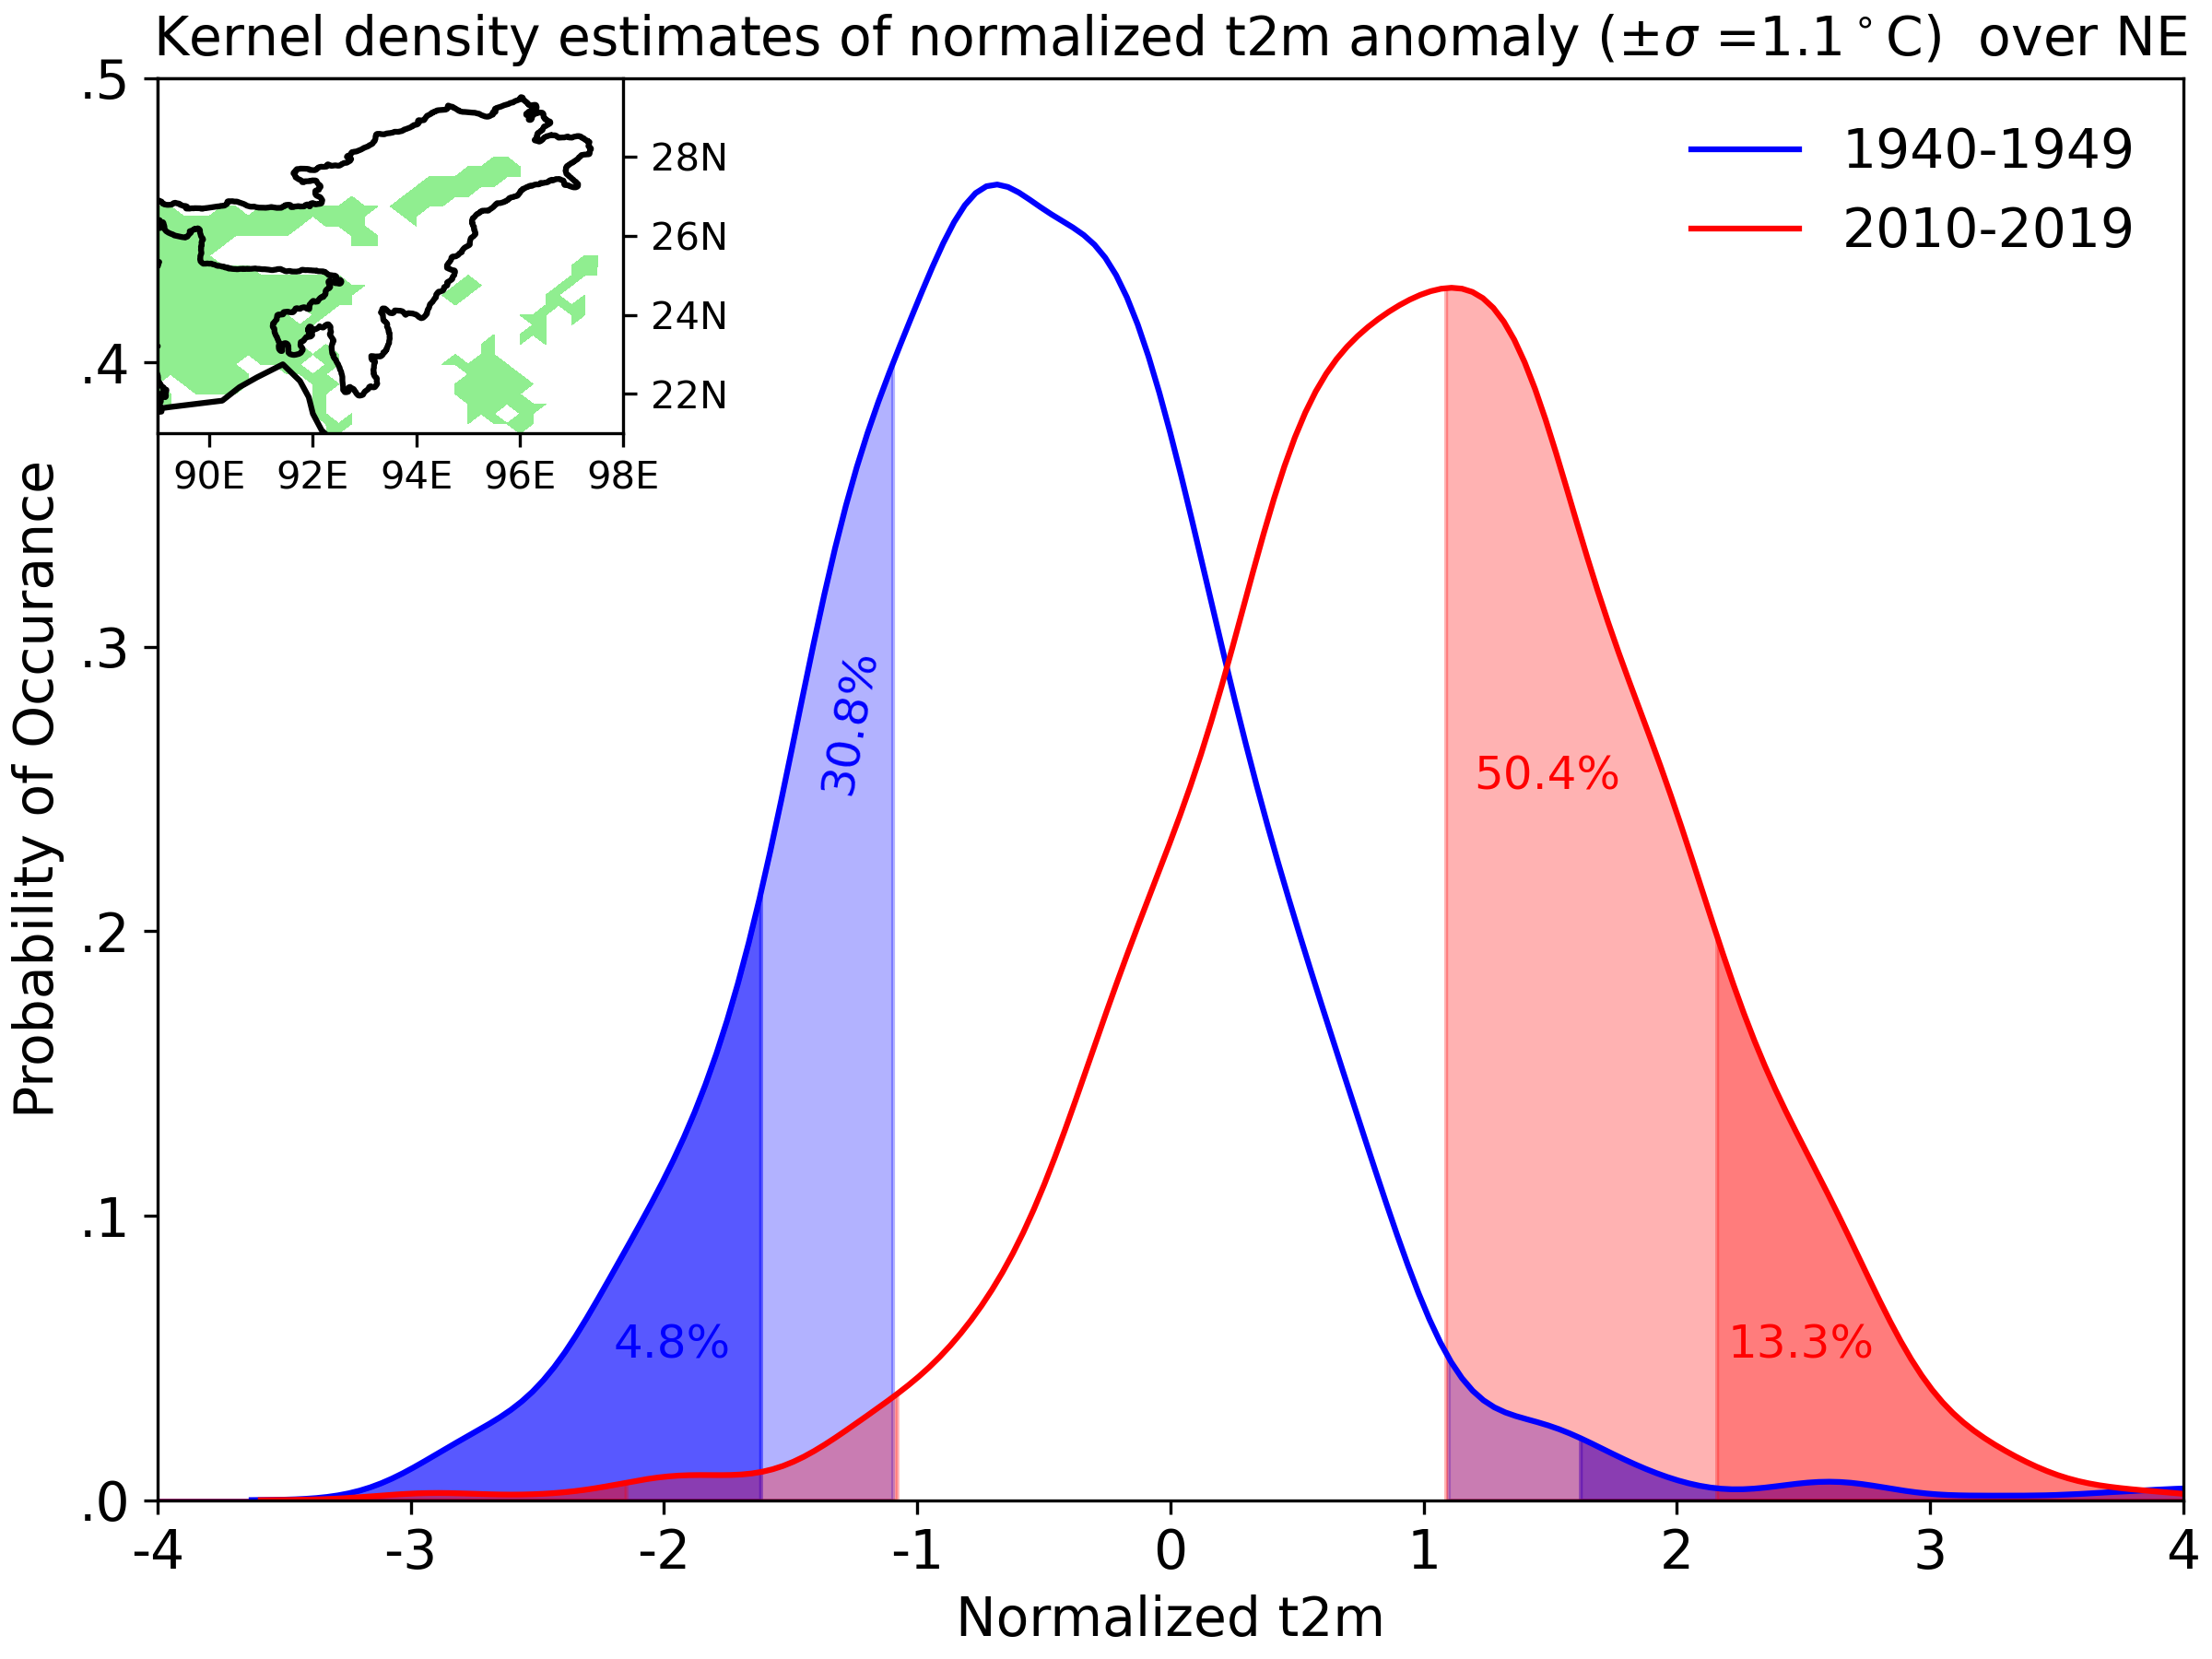

In [68]:
from IPython.display import Image, display
from IPython.display import HTML

image_path = r"D:\teachers_training_program\figures\kde.t2m.png"

# Display the image with a standard size
display(Image(filename=image_path, width=800, height=200))  # Adjust width and height as needed

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')



#### <span style="color:#007bff;">1. Introduction to Climate Models</span>

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #007bff; margin-bottom: 20px;">
    <p style="font-size: 18px;">
    Climate models are sophisticated tools that simulate the Earth's climate system. They are used to understand past, present, and future climate conditions by modeling the interactions between various components of the climate system.
    </p>
    <p style="font-size: 18px;">
    <strong>Example:</strong> <i>Climate models predicted the global temperature rise with remarkable accuracy in the 20th century, which helped validate their use in future climate projections.</i>
    </p>
</div>

#### <span style="color:#28a745;">2. Types of Climate Models</span>

<div style="background-color:#e9f7ef; padding: 15px; border-left: 5px solid #28a745; margin-bottom: 20px;">
    <p style="font-size: 18px;">
    <b>General Circulation Models (GCMs):</b> These models simulate the large-scale circulation patterns of the atmosphere and oceans, providing a detailed representation of the Earth's climate system. 
    </p>
    <p style="font-size: 18px;">
    <b>Earth System Models (ESMs):</b> ESMs extend GCMs by including additional processes such as carbon cycles, land use changes, and biogeochemical processes, making them more comprehensive.
    </p>
    <p style="font-size: 18px;">
    <strong>Learn More:</strong> Explore NASA's <a href="https://climate.nasa.gov/climate_resources/28/modeling-climate/" target="_blank" style="color:#28a745;">Climate Modeling Page</a> to dive deeper into how these models work.
    </p>
</div>

#### <span style="color:#ffc107;">3. Components of Climate Models</span>

<div style="background-color:#fff3cd; padding: 15px; border-left: 5px solid #ffc107; margin-bottom: 20px;">
    <ul style="margin-left: 20px; line-height: 1.8;">
        <li><b>Atmospheric Models:</b> Simulate atmospheric processes like temperature, precipitation, and wind patterns.</li>
        <li><b>Ocean Models:</b> Model ocean currents, temperature, and salinity, crucial for understanding phenomena like <a href="https://oceanservice.noaa.gov/facts/ninonina.html" target="_blank" style="color:#ffc107;">El Niño and La Niña</a>.</li>
        <li><b>Land Surface Models:</b> Include processes such as vegetation growth, soil moisture, and snow cover.</li>
        <li><b>Ice Models:</b> Simulate glaciers, sea ice, and ice sheets to predict changes in polar regions.</li>
    </ul>
    <p style="font-size: 18px;">
    <strong>Example:</strong> <i>The complex interactions between the atmosphere and oceans are key to predicting phenomena like El Niño, which can cause significant global weather changes.</i>
    </p>
</div>

#### <span style="color:#6c757d;">4. Climate Model Simulations and Scenarios</span>

<div style="background-color:#e2e3e5; padding: 15px; border-left: 5px solid #6c757d; margin-bottom: 20px;">
    <p style="font-size: 18px;">
    <b>Representative Concentration Pathways (RCPs):</b> RCPs represent different greenhouse gas concentration trajectories that are used in climate modeling to project future climate scenarios.
    </p>
    <p style="font-size: 18px;">
    <b>Shared Socioeconomic Pathways (SSPs):</b> SSPs are scenarios of socio-economic factors that, when combined with RCPs, provide a framework for analyzing climate impacts under different future conditions.
    </p>
<!--     <p style="font-size: 18px;">
    <strong>Figure:</strong> <i>Include a figure here that shows the different RCPs and their projected temperature increases over time.</i>
    </p> -->
</div>

#### <span style="color:#dc3545;">5. Applications of Climate Models</span>

<div style="background-color:#f8d7da; padding: 15px; border-left: 5px solid #dc3545; margin-bottom: 20px;">
    <p style="font-size: 18px;">
    Climate models are used to predict future temperature increases, sea-level rise, and changes in precipitation patterns. They help assess the potential impacts of climate change on ecosystems, agriculture, water resources, and human health. Models also inform global and regional climate policies, such as the Paris Agreement.
    </p>
    <p style="font-size: 18px;">
    <strong>Example:</strong> <i>Climate models were instrumental in the development of the Paris Agreement, which aims to limit global warming to well below 2°C.</i>
    </p>
</div>

#### <span style="color:#17a2b8;">6. Challenges and Uncertainties</span>

<div style="background-color:#d1ecf1; padding: 15px; border-left: 5px solid #17a2b8; margin-bottom: 20px;">
    <p style="font-size: 18px;">
    While climate models are powerful tools, they have limitations. These include uncertainties in projecting local climate changes and in the representation of certain climate processes. However, ongoing improvements in data collection, model resolution, and understanding of climate dynamics are helping to reduce these uncertainties.
    </p>
    <p style="font-size: 18px;">
    <strong>Learn More:</strong> Discover more about the challenges in climate modeling at the <a href="https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Full_Report.pdf" target="_blank" style="color:#17a2b8;">IPCC's latest report</a>.
    </p>
</div>



<div style="background-color:white; padding: 20px; color: #343a40; font-family: Arial, sans-serif;">

## <span style="color:#dc3545; font-size: 28px;">4. What are the Structure and Formats of Climate Data?</span>

<p style="font-size: 18px;">
Climate data is collected from a variety of sources and stored in different formats depending on the type of data, its resolution, and its intended use. Understanding these structures and formats is crucial for working effectively with climate data. Below, we explore some of the most common structures and formats used in climate science.
</p>

---

<div style="background-color:#e9ecef; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#007bff; font-size: 24px;">i. Gridded Data: How is it Structured and Used?</span>

<p style="font-size: 18px;">
Gridded data is a common format in climate science, where data is organized into a grid with specific latitude and longitude intervals. Each grid cell contains a value representing a climate variable, such as temperature or precipitation, averaged over the area of the grid cell.
</p>

<p style="font-size: 18px;">
<strong>Example:</strong> A global climate model output might have temperature data on a grid with a resolution of 1° x 1°, meaning each grid cell represents a 1° by 1° area on the Earth's surface.
</p>


<p style="font-size: 18px;">
<strong>Format:</strong> Gridded data is often stored in NetCDF (Network Common Data Form) or HDF (Hierarchical Data Format) files. These formats are designed to store large multi-dimensional data arrays efficiently.
</p>

<p style="font-size: 18px;">
<strong>Tools for Accessing:</strong> Software like Python (with libraries such as xarray and netCDF4), MATLAB, and specialized climate data tools can be used to manipulate and analyze gridded data.
</p>
</div>

---    


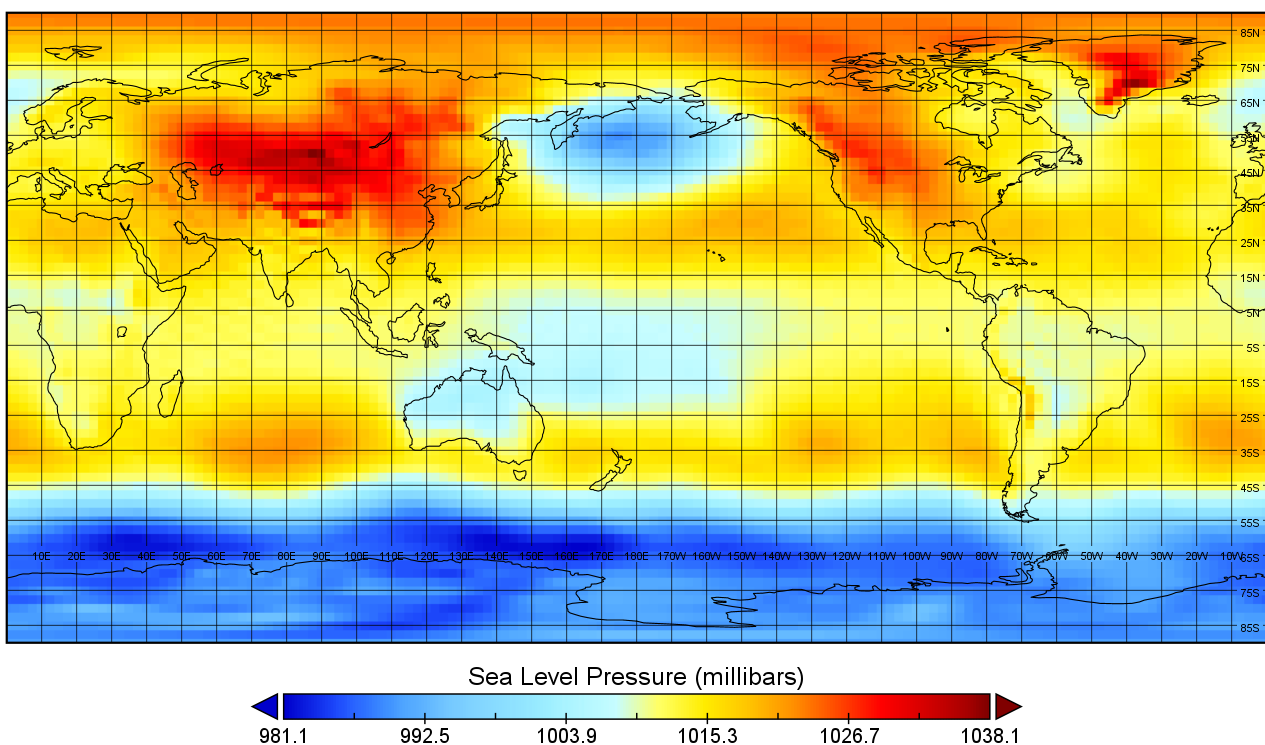

In [69]:
from IPython.display import Image, display
from IPython.display import HTML

# Path to your image
image_path = r"D:\teachers_training_program\figures\contour.png"

# Display the image
display(Image(filename=image_path))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')


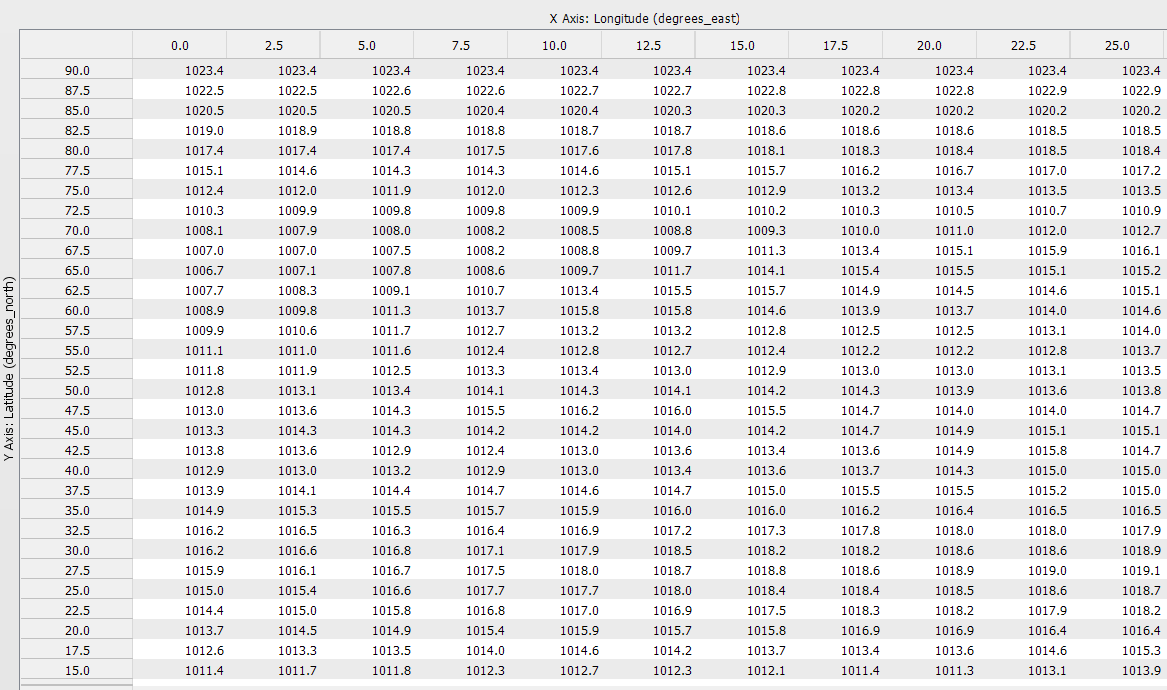

In [8]:
from IPython.display import Image, display
from IPython.display import HTML

# Path to your image
image_path = r"D:\teachers_training_program\figures\numbers.png"

# Display the image
display(Image(filename=image_path))

# Automatically hide the code after execution
HTML('''<script>
code_show = false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to toggle the code.
''')



<div style="background-color:#d4edda; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#28a745; font-size: 24px;">ii. Station Data: What Does It Include and How is It Stored?</span>

<p style="font-size: 18px;">
Station data is collected from specific locations on the Earth's surface, such as weather stations. Each station records various climate variables, such as temperature, precipitation, wind speed, and humidity, typically at regular intervals (e.g., hourly, daily).
</p>

<p style="font-size: 18px;">
<strong>Example:</strong> A weather station in New York might record the temperature every hour, providing a time series of temperature data at that location.
</p>

<p style="font-size: 18px;">
<strong>Format:</strong> Station data is often stored in CSV (Comma-Separated Values) files or as plain text files. Each row in the file typically represents a time point, with columns for different variables.
</p>

<p style="font-size: 18px;">
<strong>Tools for Accessing:</strong> Station data can be easily accessed and analyzed using spreadsheet software like Excel or programming languages like Python (with pandas) or R.
</p>
</div>

---

<div style="background-color:#fff3cd; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#ffc107; font-size: 24px;">iii. Time Series Data: How is it Organized and Applied in Climate Studies?</span>

<p style="font-size: 18px;">
Time series data refers to data collected sequentially over time. In climate science, this often involves monitoring a specific variable (such as temperature or precipitation) at a particular location or over a specific region.
</p>

<p style="font-size: 18px;">
<strong>Example:</strong> A time series of annual average global temperatures from 1880 to 2020 shows how the Earth's temperature has changed over time.
</p>

<p style="font-size: 18px;">
<strong>Format:</strong> Time series data can be stored in various formats, including CSV, JSON, or specialized time series databases. Each entry typically includes a timestamp and the corresponding data value.
</p>

<p style="font-size: 18px;">
<strong>Tools for Accessing:</strong> Python (with pandas or xarray), R, and time series analysis software are commonly used to handle and analyze time series data.
</p>
</div>

---

<div style="background-color:#dee2e6; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#6c757d; font-size: 24px;">iv. Remote Sensing Data: What Insights Does It Provide and How is It Managed?</span>

<p style="font-size: 18px;">
Remote sensing data is collected from satellites or airborne sensors, providing a global perspective of various climate variables, such as sea surface temperature, vegetation cover, and cloud patterns. This data is often available in high spatial and temporal resolution.
</p>

<p style="font-size: 18px;">
<strong>Example:</strong> The MODIS (Moderate Resolution Imaging Spectroradiometer) instrument on NASA's satellites collects remote sensing data on land surface temperature, among other variables.
</p>

<p style="font-size: 18px;">
<strong>Format:</strong> Remote sensing data is often stored in HDF, NetCDF, or GeoTIFF formats, which are suitable for large datasets with geographic metadata.
</p>

<p style="font-size: 18px;">
<strong>Tools for Accessing:</strong> GIS software like QGIS or ArcGIS, Python (with libraries like rasterio and gdal), and remote sensing-specific software can be used to process and analyze this data.
</p>
</div>

---

<div style="background-color:#f8d7da; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#dc3545; font-size: 24px;">v. Reanalysis Data: What is it and How is it Created?</span>

<p style="font-size: 18px;">
Reanalysis data combines past observations with modern climate models to provide a comprehensive, consistent dataset that extends back several decades. This data is used to understand past climate conditions and validate climate models.
</p>

<p style="font-size: 18px;">
<strong>Example:</strong> The ERA5 reanalysis dataset from ECMWF provides hourly estimates of various atmospheric, land, and oceanic climate variables from 1950 to the present.
</p>

<p style="font-size: 18px;">
<strong>Format:</strong> Reanalysis data is typically stored in NetCDF format, allowing for the efficient storage and retrieval of large multi-dimensional arrays.
</p>

<p style="font-size: 18px;">
<strong>Tools for Accessing:</strong> Python (with xarray and netCDF4), MATLAB, and specialized climate data tools can be used to access and analyze reanalysis data.
</p>
</div>




<div style="background-color:white; padding: 20px; color: #343a40; font-family: Arial, sans-serif;">

<span style="color:red; font-size: 28px;">5. What are the available essential tools for climate data analysis?</span>

<p style="font-size: 18px;">
In climate science, a variety of online and offline tools are available for data retrieval, analysis, and visualization. Below is a curated list of essential tools, categorized into online platforms and offline software applications.
</p>

---

<div style="background-color:#e9ecef; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#007bff; font-size: 24px;">Online Tools</span>

<p style="font-size: 18px;">
These web-based platforms provide access to vast datasets and powerful visualization tools, enabling researchers to analyze climate data directly from their browsers.
</p>

<ul style="font-size: 18px;">
  <li><a href="https://www.ncdc.noaa.gov/cdo-web/" style="color:#007bff;">NOAA Climate Data Online</a>: Access a wide variety of climate data from NOAA, including temperature, precipitation, and more.</li>
  <li><a href="http://weather.uwyo.edu/upperair/sounding.html" style="color:#007bff;">University of Wyoming Atmospheric Soundings</a>: Retrieve upper-air data (radiosonde soundings) from stations around the world.</li>
  <li><a href="https://giovanni.gsfc.nasa.gov/giovanni/" style="color:#007bff;">NASA Giovanni</a>: An interactive web tool for analyzing and visualizing Earth science data from NASA satellites.</li>
  <li><a href="https://cds.climate.copernicus.eu/" style="color:#007bff;">Copernicus Climate Data Store</a>: Provides free access to climate data and information from the Copernicus Climate Change Service (C3S).</li>
  <li><a href="https://search.earthdata.nasa.gov/" style="color:#007bff;">Earthdata Search</a>: A comprehensive tool from NASA to search, visualize, and download Earth observation data.</li>
  <li><a href="https://climatereanalyzer.org/" style="color:#007bff;">Climate Reanalyzer</a>: A platform for visualizing climate data, including reanalysis, forecasts, and historical observations.</li>
  <li><a href="https://www.pangaea.de/" style="color:#007bff;">PANGAEA Data Publisher</a>: An open-access library of earth and environmental science data.</li>
  <li><a href="https://openweathermap.org/" style="color:#007bff;">OpenWeatherMap</a>: Provides access to current weather data, forecasts, and historical data via API.</li>
  <li><a href="https://vis.globe.gov/GLOBE/" style="color:#007bff;">GLOBE Visualization System</a>: Explore and visualize data from the GLOBE Program, which collects environmental data from students and scientists worldwide.</li>
  <li><a href="https://www.meteoblue.com/" style="color:#007bff;">MeteoBlue Weather Data</a>: Offers detailed weather forecasts, historical weather data, and climate information.</li>
</ul>
</div>

---

<div style="background-color:#d4edda; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#28a745; font-size: 24px;">Offline Tools</span>

<p style="font-size: 18px;">
These offline tools provide powerful capabilities for advanced data processing, analysis, and visualization. They are essential for in-depth climate research.
</p>

<ul style="font-size: 18px;">
  <li><strong>MetPy</strong>: A Python library for meteorological data analysis and visualization, including weather data processing and Skew-T plotting.</li>
  <li><strong>Panoply</strong>: A cross-platform application from NASA that plots geo-referenced and other arrays from NetCDF, HDF, GRIB, and other formats.</li>
  <li><strong>QGIS</strong>: A free and open-source Geographic Information System (GIS) for creating, editing, visualizing, analyzing, and publishing geospatial information.</li>
  <li><strong>ArcGIS</strong>: A comprehensive GIS platform used for working with maps and geographic information in various ways.</li>
  <li><strong>NCL (The NCAR Command Language)</strong>: A scripting language designed specifically for the analysis and visualization of climate and weather data.</li>
  <li><strong>MATLAB</strong>: A high-level language and interactive environment used for numerical computing, including climate data analysis.</li>
  <li><strong>R (with packages like `climate`, `ncdf4`, and `raster`)</strong>: A statistical computing and graphics language widely used for climate data analysis.</li>
  <li><strong>IDL (Interactive Data Language)</strong>: A programming language used for data analysis, particularly in astronomy, meteorology, and remote sensing.</li>
  <li><strong>GrADS (The Grid Analysis and Display System)</strong>: A tool used for easy access, manipulation, and visualization of earth science data.</li>
  <li><strong>Python (with libraries such as Pandas, xarray, and Matplotlib)</strong>: Python, combined with libraries like Pandas and xarray, is widely used for handling and analyzing large datasets, including climate and weather data.</li>
</ul>
</div>

---

<div style="background-color:#fff3cd; padding: 20px; border-radius: 8px;">
<span style="color:#ffc107; font-size: 24px;">How to Use These Tools</span>

<p style="font-size: 18px;">
Whether you are working with online platforms or offline software, these tools provide a robust foundation for climate data analysis. Use online tools for quick access to data and basic visualizations, while offline tools are ideal for more detailed, customized analyses.
</p>

<p style="font-size: 18px;">
The combination of these resources allows you to explore, understand, and interpret climate data effectively, whether for research, teaching, or operational purposes.
</p>
</div>

</div>


<div style="background-color:white; padding: 20px; color: #343a40; font-family: Arial, sans-serif;">

<span style="color:#007bff; font-size: 28px;">AI Tools for Climate Data Analysis</span>

<p style="font-size: 18px;">
AI and cloud-based tools are becoming essential in climate science, offering powerful platforms for data processing, analysis, and visualization. Below are examples of how to use Google Earth Engine, one of the most popular AI tools in the field, for various applications.
</p>

---

<div style="background-color:#d1ecf1; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#0c5460; font-size: 24px;">Google Earth Engine: Getting Started</span>

<p style="font-size: 18px;">
Google Earth Engine (GEE) is a cloud-based platform for planetary-scale environmental data analysis. It allows researchers to access and analyze vast amounts of geospatial data using Google's computational infrastructure. Start by accessing GEE through this link: <a href="https://earthengine.google.com/" target="_blank" style="color:#0c5460;">Google Earth Engine</a>.
</p>

<p style="font-size: 18px;">
Below are examples of how GEE can be applied in environmental monitoring and life sciences:
</p>
</div>

---

<div style="background-color:#e2e6ea; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
<span style="color:#007bff; font-size: 24px;">Example 1: Deforestation Analysis in the Amazon</span>

<p style="font-size: 18px;">
This example demonstrates how to analyze deforestation in the Amazon rainforest by calculating the Normalized Difference Vegetation Index (NDVI).
</p>

<p style="font-size: 18px;">
<strong>Steps:</strong>
</p>
<ol style="font-size: 18px;">
  <li>Initialize the Google Earth Engine API.</li>
  <li>Define the area of interest (Amazon rainforest).</li>
  <li>Load a satellite image collection (e.g., MODIS).</li>
  <li>Calculate the mean NDVI for the selected period.</li>
  <li>Visualize the NDVI on a map.</li>
</ol>

```python
import ee
import geemap

# Initialize the Earth Engine API
ee.Initialize()

# Define an area of interest (Amazon rainforest)
aoi = ee.Geometry.Polygon([[-60, -15], [-60, -5], [-50, -5], [-50, -15]])

# Load a satellite image collection
collection = ee.ImageCollection('MODIS/006/MOD13A1').filterDate('2020-01-01', '2020-12-31').filterBounds(aoi)

# Calculate the mean NDVI for the year
mean_ndvi = collection.mean().select('NDVI')

# Create a map and display the NDVI
Map = geemap.Map()
Map.centerObject(aoi, 6)
Map.addLayer(mean_ndvi, {'min': 0, 'max': 1, 'palette': ['red', 'yellow', 'green']}, 'Mean NDVI')
Map


<div style="background-color:#fff3cd; padding: 20px; border-radius: 8px;">

### <span style="color:#856404; font-size: 24px;">Example 2: Monitoring Water Quality in Lakes</span>

<p style="font-size: 18px;">
This example shows how to monitor water quality in Lake Victoria by calculating the Normalized Difference Water Index (NDWI).
</p>

<p style="font-size: 18px;"><strong>Steps:</strong></p>
<ol style="font-size: 18px;">
  <li>Initialize the Google Earth Engine API.</li>
  <li>Define the area of interest (e.g., Lake Victoria).</li>
  <li>Load a satellite image collection (e.g., Sentinel-2).</li>
  <li>Calculate the mean NDWI for the selected period.</li>
  <li>Visualize the NDWI on a map.</li>
</ol>

```python
import ee
import geemap

# Initialize the Earth Engine API
ee.Initialize()

# Define an area of interest (e.g., Lake Victoria)
lake_victoria = ee.Geometry.Polygon([[
    [32.9, -1.2], [32.9, -3.0], [34.6, -3.0], [34.6, -1.2]
]])

# Load a satellite image collection (e.g., Sentinel-2)
collection = ee.ImageCollection('COPERNICUS/S2').filterDate('2021-01-01', '2021-12-31').filterBounds(lake_victoria)

# Calculate the mean Normalized Difference Water Index (NDWI) for the year
ndwi = collection.map(lambda image: image.normalizedDifference(['B3', 'B8'])).mean()

# Create a map and display the NDWI
Map = geemap.Map()
Map.centerObject(lake_victoria, 8)
Map.addLayer(ndwi, {'min': 0, 'max': 1, 'palette': ['blue', 'cyan', 'green']}, 'Mean NDWI')
Map


<div style="background-color:#f8f9fa; padding: 40px; border-radius: 10px; text-align: center; font-family: Arial, sans-serif;">

## <span style="color:#007bff; font-size: 32px;">Conclusion</span>

<p style="font-size: 20px; color:#343a40;">
We have covered several key aspects of climate data analysis, observation methods, and climate modeling. Below are the main takeaways:
</p>

<ul style="font-size: 18px; color:#343a40; text-align: left; display: inline-block;">
    <li><strong>Understanding Climate Data:</strong> Different formats and structures of climate data, including gridded, station, and remote sensing data.</li>
    <li><strong>Observation Methods:</strong> Ground-based, satellite, and ocean buoy observation techniques that provide critical insights into climate patterns.</li>
    <li><strong>Climate Models:</strong> The role of climate models in predicting future scenarios, including basic equations and real-world applications.</li>
    <li><strong>AI Tools:</strong> Utilization of advanced tools like Google Earth Engine and Google Colab for analyzing large-scale climate datasets.</li>
    <li><strong>Practical Applications:</strong> Demonstrated real-world applications in environmental monitoring, agriculture, and water quality analysis.</li>
</ul>

<p style="font-size: 20px; color:#343a40;">
These tools and methods are indispensable for addressing the challenges posed by climate change. By leveraging these resources, we can enhance our understanding and contribute to effective climate action.
</p>

<br>


</div>


<div style="background-color:#f0f0f0; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;">

## <span style="color:#007bff; font-size: 28px;">Acknowledgments</span>

<p style="font-size: 18px; color:#343a40;">
This presentation has been made possible through the contributions and resources provided by various organizations and individuals.
</p>

### <span style="color:#28a745; font-size: 24px;">1. Data Sources</span>

<p style="font-size: 18px; color:#343a40;">
The climate data and figures used in this talk were sourced from the NASA, JAXA, RIKEN, ECMWF, NCEP, CMIPs and other reliable public climate databases. These datasets are critical to our understanding of climate dynamics and trends, and I am grateful for their availability and access.
</p>

### <span style="color:#28a745; font-size: 24px;">2. Tools and Visualizations</span>

<p style="font-size: 18px; color:#343a40;">
The visualizations presented were created using tools like Google Earth Engine and MetPy, which have been instrumental in analyzing and illustrating complex climate data. I appreciate the continued development and support of these tools by their respective teams.
</p>

### <span style="color:#28a745; font-size: 24px;">3. Academic and Institutional Support</span>

<p style="font-size: 18px; color:#343a40;">
My deepest gratitude goes to my supervisors, Dr. Rahul Mahanta and Prof. B.N. Goswami, for their invaluable guidance and support throughout this research. I would also like to express my sincere thanks to Dr. Prasanta Goswami for valuable discussions on these topics.
</p>

<p style="font-size: 18px; color:#343a40;">
Additionally, I extend my gratitude to the Centre for Cloud and Climate Change and the Assam Science Technology and Environment Council (ASTEC) for inviting me to give these talks, and to Cotton University for providing the necessary resources and a conducive environment for this work.
</p>

---

<div style="background-color:#d1ecf1; padding: 20px; border-radius: 8px; text-align:center; margin-top: 20px;">

<p style="font-size: 18px; color:#0c5460;">
For more information, you can reach me at:
</p>

<p style="font-size: 18px; color:#007bff;">
<strong>Email:</strong> end.havoc@gmail.com | phy1891004_prolay@cottonuniversity.ac.in
</p>

<p style="font-size: 18px; color:#007bff;">
<strong>ORCID ID:</strong> 
<a href="https://orcid.org/0000-0002-9404-9029" target="_blank" style="color:#007bff;">https://orcid.org/0000-0002-9404-9029</a>
</p>

<p style="font-size: 18px; color:#007bff;">
<strong>LinkedIn:</strong> 
<a href="https://www.linkedin.com/in/prolay-saha-a44744186" target="_blank" style="color:#007bff;">linkedin.com/in/prolay-saha-a44744186</a>
</p>

</div>




<div align="center">
  <span style="font-size: 48px; color: black; font-family: Arial, sans-serif;"><b>Thank You!</b></span>
</div>
